<a href="https://colab.research.google.com/github/seunghwan1228/Titanic/blob/master/6)_Titanic_ML_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This document contains several ML models, 
the baseline of accuracy is 

Training : 0.8441011235955056  ≈  84.41%

Validation : 0.7988826815642458  ≈  79.89%
---
## Object : 

Running many different models and choose more valueable model to use 

---


Part 2
*  KNN
* Naive Bayes
* Logistic Regression
* SVM - linear / kernel


---

part 3
*  Decision Tree - with visualization
*  Boosting - Adaboost / gradient boost
*  RandomForest
*  Ensemble - Vote classifier with (Randomforest, KNN, Naive Bayes, Logit, SVM, AdaBoost, XGBoost)



---


part 4
*  ## Neural network with Keras

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import export_graphviz
import graphviz

from keras import models, layers
from keras.losses import binary_crossentropy
from keras import callbacks
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

# 0) pre_steps

In [0]:
train = pd.read_csv('/content/drive/input/Titanic/working_dir/train_final.csv')

In [0]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,Survived
0,-0.502445,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.786845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.488854,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.420730,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-0.486337,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [0]:
y = train.Survived
X = train.drop('Survived', axis=1)

In [0]:
print(X.shape)
print(y.shape)

(891, 29)
(891,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [0]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 29) (712,)
(179, 29) (179,)


# 1) Neural Network 

In [0]:
np.random.seed(42)

## 1-1) 

In [0]:
network = models.Sequential()
network.add(layers.Dense(10, activation = 'relu', input_shape=(29,)))
network.add(layers.Dense(15, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid'))
network.summary()

network.compile(loss = binary_crossentropy, optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_204 (Dense)            (None, 10)                300       
_________________________________________________________________
dense_205 (Dense)            (None, 15)                165       
_________________________________________________________________
dense_206 (Dense)            (None, 1)                 16        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [0]:
network_history = network.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

In [0]:
model_history = network_history.history

Text(0.5, 1.0, 'Accuracy')

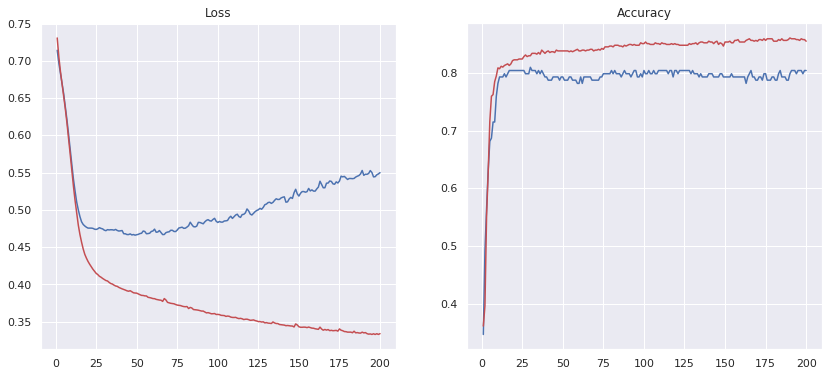

In [0]:
epochs = np.arange(1, 201)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set()
plt.plot(epochs, model_history['val_loss'], 'b-', label = 'val_loss')
plt.plot(epochs, model_history['loss'], 'r-', label = 'loss')
plt.title('Loss')

plt.subplot(1,2,2)
sns.set()
plt.plot(epochs, model_history['val_acc'], 'b-', label = 'val_loss')
plt.plot(epochs, model_history['acc'], 'r-', label = 'loss')
plt.title('Accuracy')

### 1-1 ) Mark -  seems bottle-neck occurd

## 1-2)

In [0]:
network = models.Sequential()
network.add(layers.Dense(30, activation = 'relu', input_shape=(29,)))
network.add(layers.Dense(30, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid'))
network.summary()

network.compile(loss = binary_crossentropy, optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_207 (Dense)            (None, 30)                900       
_________________________________________________________________
dense_208 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_209 (Dense)            (None, 1)                 31        
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


In [0]:
network_history = network.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 4s 6ms/step - loss: 0.6585 - acc: 0.6292 - val_loss: 0.6450 - val_acc: 0.6034
Epoch 2/100
712/712 [==============================] - 0s 85us/step - loss: 0.6152 - acc: 0.6292 - val_loss: 0.6069 - val_acc: 0.6313
Epoch 3/100
712/712 [==============================] - 0s 74us/step - loss: 0.5781 - acc: 0.6685 - val_loss: 0.5710 - val_acc: 0.6816
Epoch 4/100
712/712 [==============================] - 0s 75us/step - loss: 0.5445 - acc: 0.7374 - val_loss: 0.5394 - val_acc: 0.7263
Epoch 5/100
712/712 [==============================] - 0s 76us/step - loss: 0.5148 - acc: 0.7851 - val_loss: 0.5124 - val_acc: 0.8045
Epoch 6/100
712/712 [==============================] - 0s 77us/step - loss: 0.4913 - acc: 0.7963 - val_loss: 0.4883 - val_acc: 0.8101
Epoch 7/100
712/712 [==============================] - 0s 73us/step - loss: 0.4708 - acc: 0.8118 - val_loss: 0.4735 - val_acc: 0.8045
Epoch 8/100
712/7

Text(0.5, 1.0, 'Accuracy')

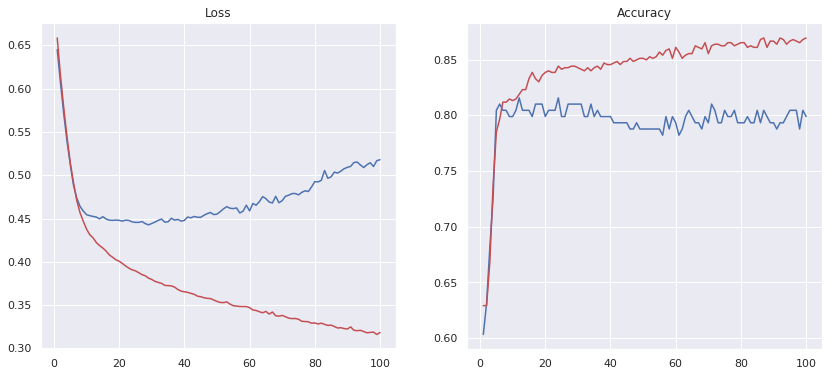

In [0]:
model_history = network_history.history
epochs = np.arange(1, 101)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set()
plt.plot(epochs, model_history['val_loss'], 'b-', label = 'val_loss')
plt.plot(epochs, model_history['loss'], 'r-', label = 'loss')
plt.title('Loss')

plt.subplot(1,2,2)
sns.set()
plt.plot(epochs, model_history['val_acc'], 'b-', label = 'val_loss')
plt.plot(epochs, model_history['acc'], 'r-', label = 'loss')
plt.title('Accuracy')

In [0]:
network.evaluate(X_train, y_train)

712/712 [==============================] - 0s 54us/step


[0.26948929569694435, 0.8904494382022472]

In [0]:
model_history = network_history.history

Text(0.5, 1.0, 'Accuracy')

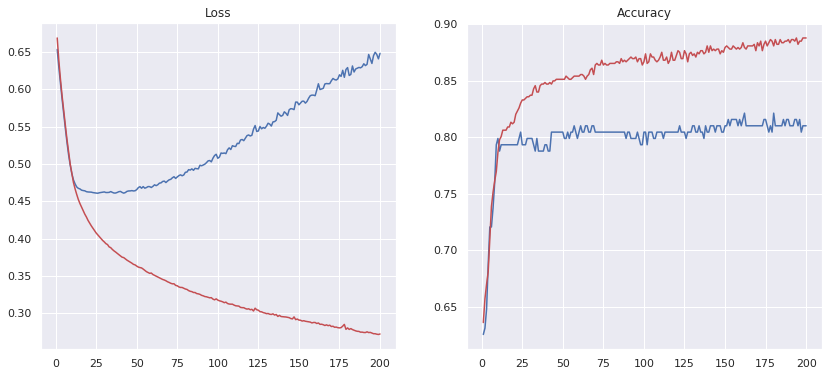

In [0]:
epochs = np.arange(1, 201)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set()
plt.plot(epochs, model_history['val_loss'], 'b-', label = 'val_loss')
plt.plot(epochs, model_history['loss'], 'r-', label = 'loss')
plt.title('Loss')

plt.subplot(1,2,2)
sns.set()
plt.plot(epochs, model_history['val_acc'], 'b-', label = 'val_loss')
plt.plot(epochs, model_history['acc'], 'r-', label = 'loss')
plt.title('Accuracy')

## 1-3)

In [0]:
network = models.Sequential()
network.add(layers.Dense(29, activation = 'relu', input_shape=(29,)))
network.add(layers.Dropout(0.25))
network.add(layers.Dense(20, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid'))
network.summary()

network.compile(loss = binary_crossentropy, optimizer='adam', metrics=['accuracy'])

W0617 08:06:27.979560 139980242290560 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 29)                870       
_________________________________________________________________
dropout_1 (Dropout)          (None, 29)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                600       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [0]:
network_history = network.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 877us/step - loss: 0.6676 - acc: 0.5857 - val_loss: 0.6286 - val_acc: 0.6927
Epoch 2/100
712/712 [==============================] - 0s 83us/step - loss: 0.6225 - acc: 0.6826 - val_loss: 0.5977 - val_acc: 0.7263
Epoch 3/100
712/712 [==============================] - 0s 63us/step - loss: 0.5882 - acc: 0.6896 - val_loss: 0.5730 - val_acc: 0.7374
Epoch 4/100
712/712 [==============================] - 0s 70us/step - loss: 0.5704 - acc: 0.7121 - val_loss: 0.5514 - val_acc: 0.7318
Epoch 5/100
712/712 [==============================] - 0s 66us/step - loss: 0.5498 - acc: 0.7374 - val_loss: 0.5318 - val_acc: 0.7542
Epoch 6/100
712/712 [==============================] - 0s 69us/step - loss: 0.5360 - acc: 0.7598 - val_loss: 0.5144 - val_acc: 0.7598
Epoch 7/100
712/712 [==============================] - 0s 69us/step - loss: 0.5146 - acc: 0.7851 - val_loss: 0.5009 - val_acc: 0.7709
Epoch 8/100
712

Text(0.5, 1.0, 'Accuracy')

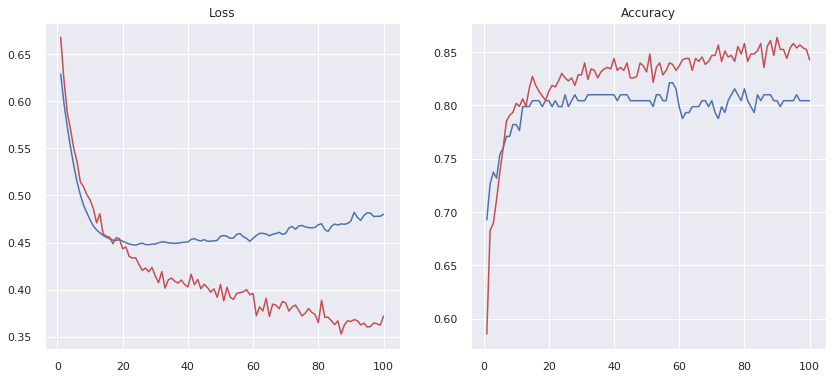

In [0]:
model_history = network_history.history
epochs = np.arange(1, 101)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set()
plt.plot(epochs, model_history['val_loss'], 'b-', label = 'val_loss')
plt.plot(epochs, model_history['loss'], 'r-', label = 'loss')
plt.title('Loss')

plt.subplot(1,2,2)
sns.set()
plt.plot(epochs, model_history['val_acc'], 'b-', label = 'val_loss')
plt.plot(epochs, model_history['acc'], 'r-', label = 'loss')
plt.title('Accuracy')

## Final Model

to generalize, add droptout layer

In [0]:
network = models.Sequential()
network.add(layers.Dense(29, activation = 'relu', input_shape=(29,)))
network.add(layers.Dropout(0.25))
network.add(layers.Dense(20, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid'))
network.summary()

network.compile(loss = binary_crossentropy, optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 29)                870       
_________________________________________________________________
dropout_5 (Dropout)          (None, 29)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 20)                600       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 21        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [0]:
network_history = network.fit(X_train, y_train, epochs=28, batch_size=64, validation_data=(X_test, y_test))

Train on 712 samples, validate on 179 samples
Epoch 1/28
712/712 [==============================] - 1s 1ms/step - loss: 0.6817 - acc: 0.6236 - val_loss: 0.6680 - val_acc: 0.5978
Epoch 2/28
712/712 [==============================] - 0s 73us/step - loss: 0.6497 - acc: 0.6362 - val_loss: 0.6392 - val_acc: 0.6089
Epoch 3/28
712/712 [==============================] - 0s 68us/step - loss: 0.6252 - acc: 0.6615 - val_loss: 0.6151 - val_acc: 0.6425
Epoch 4/28
712/712 [==============================] - 0s 69us/step - loss: 0.5997 - acc: 0.6784 - val_loss: 0.5914 - val_acc: 0.6704
Epoch 5/28
712/712 [==============================] - 0s 64us/step - loss: 0.5853 - acc: 0.6980 - val_loss: 0.5709 - val_acc: 0.6816
Epoch 6/28
712/712 [==============================] - 0s 64us/step - loss: 0.5580 - acc: 0.7486 - val_loss: 0.5529 - val_acc: 0.7151
Epoch 7/28
712/712 [==============================] - 0s 78us/step - loss: 0.5407 - acc: 0.7542 - val_loss: 0.5359 - val_acc: 0.7374
Epoch 8/28
712/712 [====

In [0]:
network.evaluate(X_train, y_train)

712/712 [==============================] - 0s 54us/step


[0.3949717603037866, 0.8426966292134831]

In [0]:
network.evaluate(X_test, y_test)

179/179 [==============================] - 0s 102us/step


[0.4386999398969405, 0.8100558689186693]

## Save the model

In [0]:
# network.save('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/Titanic_model.h5')

# 2) Keras with sklearn

In [0]:
def create_model():
  network = models.Sequential()
  network.add(layers.Dense(29, activation = 'relu', input_shape=(29,)))
  network.add(layers.Dropout(0.25))
  network.add(layers.Dense(20, activation = 'relu'))
  network.add(layers.Dense(1, activation = 'sigmoid'))
  

  network.compile(loss = binary_crossentropy, optimizer='adam', metrics=['accuracy'])
  return network

In [0]:
keras_model = KerasClassifier(create_model, epochs=28, batch_size=64)

In [0]:
keras_model.fit(X_train, y_train)

W0617 11:24:17.113283 140634132301696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 11:24:17.149371 140634132301696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 11:24:17.159127 140634132301696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 11:24:17.176769 140634132301696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0617 11:24:17.185493 

Epoch 1/28
712/712 [==============================] - 4s 6ms/step - loss: 0.7135 - acc: 0.4508
Epoch 2/28
712/712 [==============================] - 0s 65us/step - loss: 0.6699 - acc: 0.6306
Epoch 3/28
712/712 [==============================] - 0s 61us/step - loss: 0.6316 - acc: 0.6503
Epoch 4/28
712/712 [==============================] - 0s 59us/step - loss: 0.6008 - acc: 0.6559
Epoch 5/28
712/712 [==============================] - 0s 66us/step - loss: 0.5867 - acc: 0.6573
Epoch 6/28
712/712 [==============================] - 0s 60us/step - loss: 0.5593 - acc: 0.6994
Epoch 7/28
712/712 [==============================] - 0s 60us/step - loss: 0.5481 - acc: 0.7303
Epoch 8/28
712/712 [==============================] - 0s 58us/step - loss: 0.5220 - acc: 0.7640
Epoch 9/28
712/712 [==============================] - 0s 64us/step - loss: 0.5014 - acc: 0.7921
Epoch 10/28
712/712 [==============================] - 0s 65us/step - loss: 0.5040 - acc: 0.7823
Epoch 11/28
712/712 [===================

In [0]:
result = cross_val_score(keras_model, X_train, y_train, cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/28
569/569 [==============================] - 0s 536us/step - loss: 0.6824 - acc: 0.5817
Epoch 2/28
569/569 [==============================] - 0s 59us/step - loss: 0.6449 - acc: 0.6819
Epoch 3/28
569/569 [==============================] - 0s 56us/step - loss: 0.6157 - acc: 0.7030
Epoch 4/28
569/569 [==============================] - 0s 64us/step - loss: 0.5941 - acc: 0.7135
Epoch 5/28
569/569 [==============================] - 0s 58us/step - loss: 0.5719 - acc: 0.7258
Epoch 6/28
569/569 [==============================] - 0s 56us/step - loss: 0.5494 - acc: 0.7364
Epoch 7/28
569/569 [==============================] - 0s 57us/step - loss: 0.5335 - acc: 0.7469
Epoch 8/28
569/569 [==============================] - 0s 56us/step - loss: 0.5208 - acc: 0.7592
Epoch 9/28
569/569 [==============================] - 0s 61us/step - loss: 0.5019 - acc: 0.7733
Epoch 10/28
569/569 [==============================] - 0s 75us/step - loss: 0.4866 - acc: 0.7645
Epoch 11/28
569/569 [=================

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished


In [0]:
np.mean(result)

0.8076135133271569

In [0]:
result_test = cross_val_score(keras_model, X_test, y_test, cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/28
143/143 [==============================] - 1s 6ms/step - loss: 0.7319 - acc: 0.3566
Epoch 2/28
143/143 [==============================] - 0s 118us/step - loss: 0.7205 - acc: 0.3846
Epoch 3/28
143/143 [==============================] - 0s 119us/step - loss: 0.7054 - acc: 0.3916
Epoch 4/28
143/143 [==============================] - 0s 95us/step - loss: 0.6964 - acc: 0.5455
Epoch 5/28
143/143 [==============================] - 0s 101us/step - loss: 0.6755 - acc: 0.6014
Epoch 6/28
143/143 [==============================] - 0s 107us/step - loss: 0.6665 - acc: 0.6993
Epoch 7/28
143/143 [==============================] - 0s 103us/step - loss: 0.6590 - acc: 0.6643
Epoch 8/28
143/143 [==============================] - 0s 87us/step - loss: 0.6620 - acc: 0.6993
Epoch 9/28
143/143 [==============================] - 0s 87us/step - loss: 0.6569 - acc: 0.6923
Epoch 10/28
143/143 [==============================] - 0s 90us/step - loss: 0.6484 - acc: 0.7063
Epoch 11/28
143/143 [==============

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.7s finished


In [0]:
np.mean(result_test)

0.75984126329422

In [0]:
kfold_cv = KFold(n_splits=5, random_state=42, shuffle=True)

In [0]:
kfold_train_result = cross_val_score(keras_model, X_train, y_train, cv=kfold_cv)

Epoch 1/28
569/569 [==============================] - 1s 2ms/step - loss: 0.7793 - acc: 0.3093
Epoch 2/28
569/569 [==============================] - 0s 63us/step - loss: 0.7332 - acc: 0.3568
Epoch 3/28
569/569 [==============================] - 0s 68us/step - loss: 0.6970 - acc: 0.4780
Epoch 4/28
569/569 [==============================] - 0s 68us/step - loss: 0.6735 - acc: 0.6397
Epoch 5/28
569/569 [==============================] - 0s 62us/step - loss: 0.6487 - acc: 0.6995
Epoch 6/28
569/569 [==============================] - 0s 64us/step - loss: 0.6162 - acc: 0.7153
Epoch 7/28
569/569 [==============================] - 0s 68us/step - loss: 0.5930 - acc: 0.7381
Epoch 8/28
569/569 [==============================] - 0s 62us/step - loss: 0.5701 - acc: 0.7293
Epoch 9/28
569/569 [==============================] - 0s 60us/step - loss: 0.5412 - acc: 0.7645
Epoch 10/28
569/569 [==============================] - 0s 63us/step - loss: 0.5242 - acc: 0.7698
Epoch 11/28
569/569 [===================

In [0]:
np.mean(kfold_train_result)

0.8118093175241352

In [0]:
kfold_test_result = cross_val_score(keras_model, X_test, y_test, cv=kfold_cv)

Epoch 1/28
143/143 [==============================] - 1s 10ms/step - loss: 0.7058 - acc: 0.5385
Epoch 2/28
143/143 [==============================] - 0s 111us/step - loss: 0.6903 - acc: 0.5524
Epoch 3/28
143/143 [==============================] - 0s 110us/step - loss: 0.6750 - acc: 0.5664
Epoch 4/28
143/143 [==============================] - 0s 113us/step - loss: 0.6742 - acc: 0.5524
Epoch 5/28
143/143 [==============================] - 0s 102us/step - loss: 0.6562 - acc: 0.5664
Epoch 6/28
143/143 [==============================] - 0s 113us/step - loss: 0.6433 - acc: 0.5804
Epoch 7/28
143/143 [==============================] - 0s 99us/step - loss: 0.6434 - acc: 0.5874
Epoch 8/28
143/143 [==============================] - 0s 108us/step - loss: 0.6352 - acc: 0.6224
Epoch 9/28
143/143 [==============================] - 0s 99us/step - loss: 0.6171 - acc: 0.5804
Epoch 10/28
143/143 [==============================] - 0s 105us/step - loss: 0.6307 - acc: 0.6014
Epoch 11/28
143/143 [===========

In [0]:
np.mean(kfold_test_result)

0.7495238065719605

# 3) Ensenble with randomforest, XGBoost


In [0]:
def create_model():
  network = models.Sequential()
  network.add(layers.Dense(29, activation = 'relu', input_shape=(29,)))
  network.add(layers.Dropout(0.25))
  network.add(layers.Dense(20, activation = 'relu'))
  network.add(layers.Dense(1, activation = 'sigmoid'))
  

  network.compile(loss = binary_crossentropy, optimizer='adam', metrics=['accuracy'])
  return network

In [0]:
estimators = []

model1 = RandomForestClassifier(random_state=42)
estimators.append(('rnd_clf', model1))

model2 = XGBClassifier(random_state=42)
estimators.append(('xgb_clf ', model2))

model3 = KerasClassifier(create_model, epochs=28, batch_size=64, verbose=0)
estimators.append(('keras',model3))

In [0]:
ensembel = VotingClassifier(estimators, voting='soft')
ensembel.estimators

[('rnd_clf',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators='warn',
                         n_jobs=None, oob_score=False, random_state=42, verbose=0,
                         warm_start=False)),
 ('xgb_clf ',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.1, max_delta_step=0, max_depth=3,
                min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                nthread=None, objective='binary:logistic', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                silent=None, subsam

In [0]:
ensembel.fit(X_train, y_train)

VotingClassifier(estimators=[('rnd_clf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators='warn',
                                                     n_jobs=None,
  

In [0]:
ensembel.score(X_train, y_train)

0.9030898876404494

In [0]:
ensembel.score(X_test, y_test)

0.8156424581005587

In [0]:
cv_result = cross_val_score(ensembel, X_train, y_train, cv = 5)

In [0]:
np.mean(cv_result)

0.8244426236035466

In [0]:
cv_result = cross_val_score(ensembel, X_test, y_test, cv = 5)

In [0]:
cv_result

array([0.75      , 0.83333333, 0.75      , 0.69444444, 0.85714286])

In [0]:
np.mean(cv_result)

0.776984126984127

## Conclusion - Ensemble - soft voting

for the Decision Tree, its performance is 

Train : 0.9030898876404494  $\approx $ 90.30%

Test : 0.8156424581005587$\approx $ 81.56%



---


with kfold cv : 

Train : 0.82444262360354669  $\approx $ 82.44%

Test : 0.776984126984127 $\approx $ 77.70%


{'max_depth': 7, 'max_leaf_nodes': 12, 'min_samples_split': 14}

### Appendix : checking each result of models

In [0]:
model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
model3.fit(X_train,y_train)

In [0]:
model1_pred = model1.predict(X_train)
model2_pred = model2.predict(X_train)
model3_pred = model3.predict(X_train)

In [0]:
ensemble_result = pd.DataFrame([model1_pred, model2_pred, model3_pred.ravel()])
ensemble_result

In [0]:
ensemble_result_t = ensemble_result.transpose()
ensemble_result_t.columns = ['model1', 'model2', 'model3']
ensemble_result_t

# ensemble_result_t.to_csv('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/model_results.csv')

,model1,model2,model3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,1
6,0,0,1
7,0,0,0
8,0,0,0
9,0,0,0
